# Import ALL Necessary Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

- The data imported from the Matlab-simulink model are in **csv format**, with name as "{Fault}_noise_02.csv"
- **M** number of such files are present, coresponding to **M** faults.
- In each fault file, the fault is introduced at **t=\[1000,1500\]s** for incipient fault and **t=\[2000,2500\]s** for the step fault.

The Goal is to extract only the values of residuals between t=\[1000,1500\]s and t=\[2000,2500\]s. These values are then stored in a **new DataFrame**, which contains the residual information for all the fault classes.

# Visualize the time evolution of ARRs

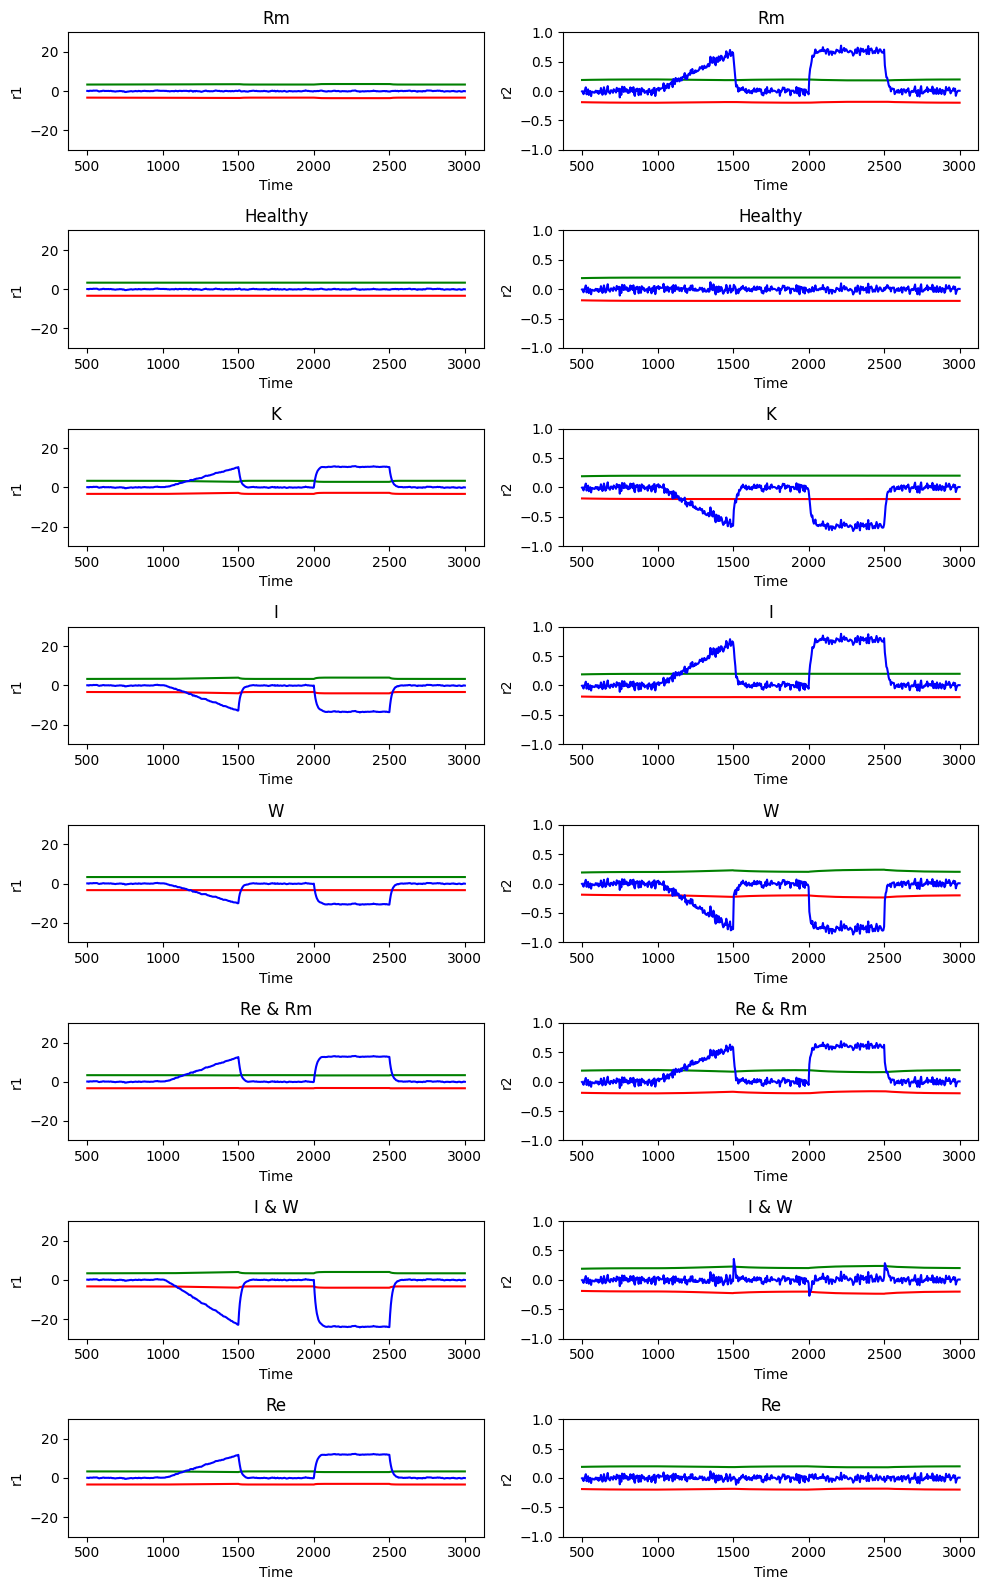

In [ ]:
Path = r'/content/drive/MyDrive/ALL_DC_motor_Data/Ua_120V_Noise_2_perct'.format(40)
file_name = os.listdir(path=Path)
fig, axs = plt.subplots(len(file_name), 2, figsize=(10, 2 * len(file_name)))

for i, file in enumerate(file_name):
    csv_path = os.path.join(Path, file)
    df = pd.read_csv(csv_path)
    df = df.iloc[::50]
    ax1 = axs[i][0]
    ax2 = axs[i][1]
    ax1.plot(df['time'], df['a1_lower'], '-r', label='')
    ax2.plot(df['time'], df['a2_lower'], '-r', label='')
    ax1.plot(df['time'], df['a1_upper'], '-g', label='a1')
    ax2.plot(df['time'], df['a2_upper'], '-g', label='a2')
    ax1.plot(df['time'], df['ARR1'], '-b', label='')
    ax2.plot(df['time'], df['ARR2'], '-b', label='')
    ax1.set_title(file[:-13])
    ax1.set_ylim(-30, 30)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('r1')
    ax2.set_title(file[:-13])
    ax2.set_ylim(-1, 1)
    ax2.set_xlabel('Time')
    ax2.set_ylabel('r2')
    # ax1.legend()
    # ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
file_name

['Healthy_noise_02.csv', 'Rm_noise_02.csv']

In [ ]:
axs

array([[<Axes: title={'center': 'Healthy'}, xlabel='Time', ylabel='r1'>,
        <Axes: title={'center': 'Healthy'}, xlabel='Time', ylabel='r2'>],
       [<Axes: title={'center': 'Rm'}, xlabel='Time', ylabel='r1'>,
        <Axes: title={'center': 'Rm'}, xlabel='Time', ylabel='r2'>]],
      dtype=object)

In [ ]:
for i, file in enumerate(file_name):
  print(i)

0
1


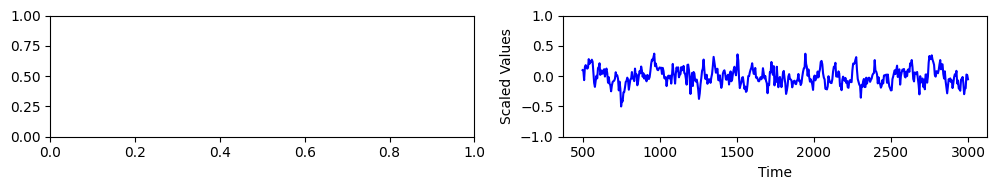

In [ ]:
Path = r'/content/drive/MyDrive/ALL_DC_motor_Data/Ua_120V_Noise_2_perct'.format(40)
file_name = os.listdir(path=Path)
file_name = ['Healthy_noise_02.csv']
fig, axsis = plt.subplots(len(file_name), 2, figsize=(10, 2 * len(file_name)))
csv_path = os.path.join(Path, 'Healthy_noise_02.csv')
df = pd.read_csv(csv_path)
df_120 = pd.read_csv(csv_path)
df = df.iloc[::50]
df1 = df.iloc[::50]
plt.plot(df['time'], df['a1_lower'], '-r')
plt.plot(df1['time'], df1['a1_upper'], '-g')
plt.plot(df['time'], df['ARR1'], '-b')
ax1.set_title('Healthy_noise_02.csv'[:-13])
plt.xlabel('Time')
plt.ylabel('Scaled Values')
plt.ylim(-1, 1)
plt.tight_layout()
plt.show()

# Visualize time evolution of sensor data

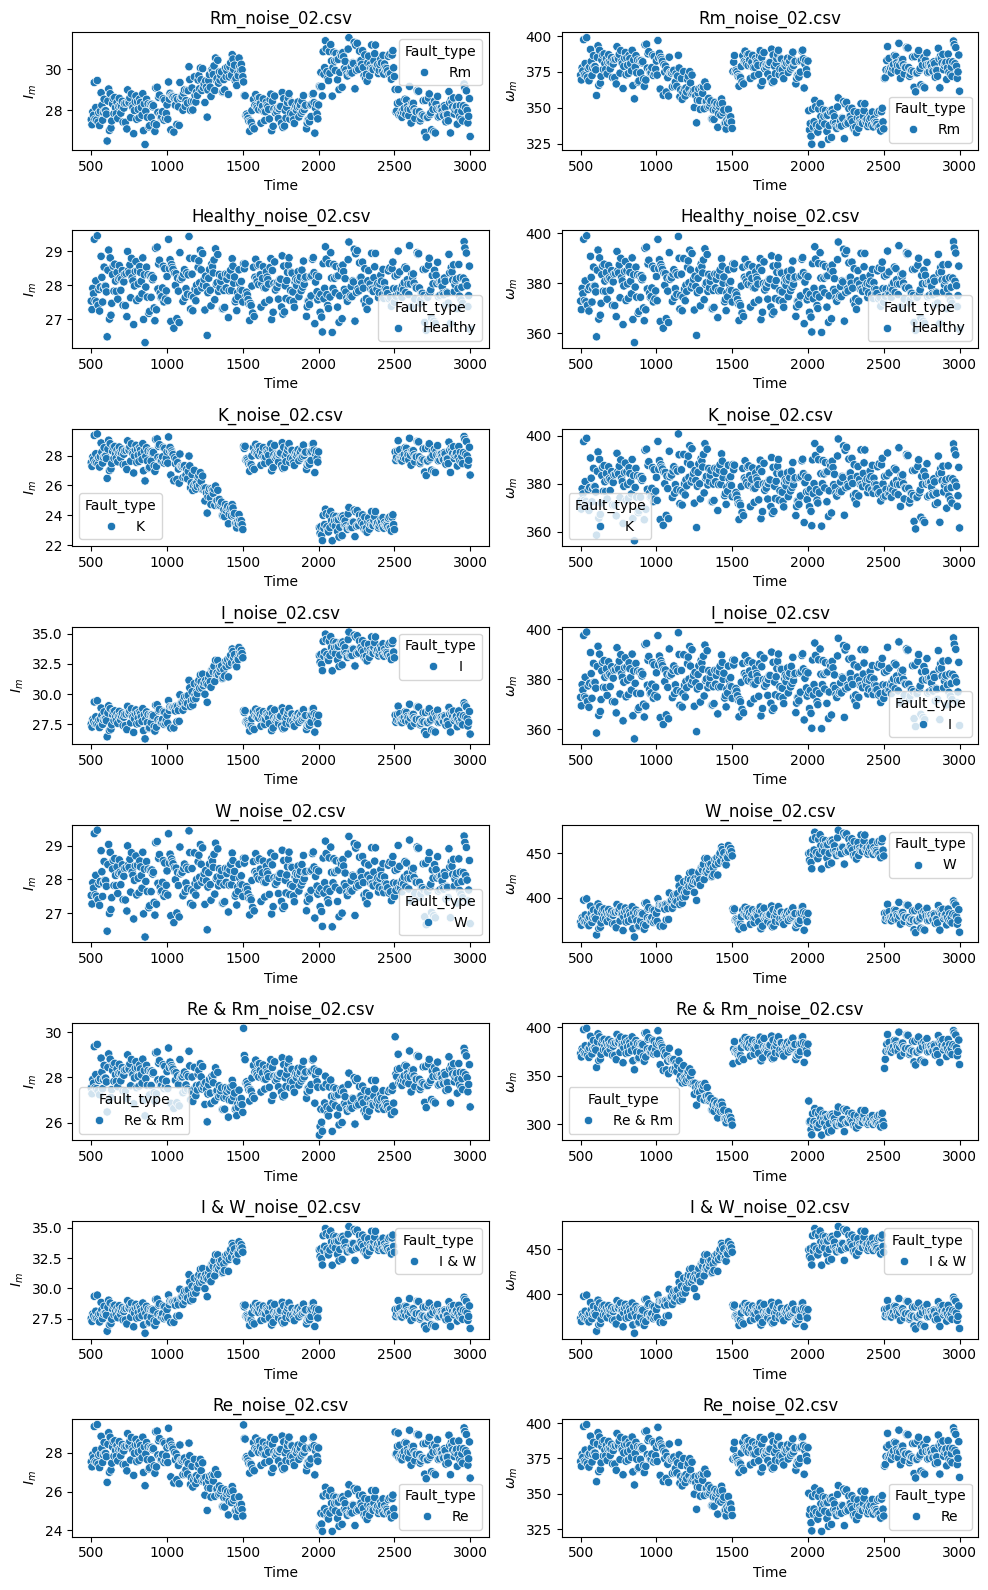

In [ ]:
Path = r'/content/drive/MyDrive/ALL_DC_motor_Data/Ua_120V_Noise_2_perct'.format(40) # Path of the folder containing CSV files from that working condition
file_name = os.listdir(path=Path) # List of all the files in the folder

fig, axs = plt.subplots(len(file_name), 2, figsize=(10, 2 * len(file_name)))

for i, file in enumerate(file_name):
    csv_path = os.path.join(Path, file)  # Obtains the exact path for that file
    df = pd.read_csv(csv_path)  # saves that Fault data in a dummy variable "df"
    df = df.iloc[::50]
    ax1 = axs[i][0]
    ax2 = axs[i][1]
    sns.scatterplot(data=df, x=df['time'], y=df['Im'], hue=df['Fault_type'], ax=ax1)
    sns.scatterplot(data=df, x=df['time'], y=df['Wm'], hue=df['Fault_type'], ax=ax2)
    ax1.set_title(file)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('$I_m$')
    ax2.set_title(file)
    ax2.set_xlabel('Time')
    ax2.set_ylabel('$\omega_m$')

plt.tight_layout()
plt.show()

# Create a daraframe having all the faults data with thier residual values and sensor measurements

In [ ]:


def obtain_DataFrame_for_this_working_condition(working_cond):
    # Input = "Working Condition" [40V, 80V, 120V]
    # Output = "A dataFrame contaning all fault scnerio from that Working Condition"

    # The DataFrame has following columns [time, I, W, ARR1, ARR2, a1_upper,  a1_lower, a2_upper,  a2_lower,  activation_arr1,  activation_arr2 FaultClass] for the given "working_cond"

    Path = r'/content/drive/MyDrive/ALL_DC_motor_Data/Ua_{}V_Noise_2_perct'.format(working_cond) # Path of the folder containing CSV files from that working condition
    file_name = os.listdir(path=Path) # List of all the files in the folder

    DF = pd.DataFrame() # Initialize an empty DataFrame

    for f in file_name : #Iterate through each file, which coresponds to a Fault

        csv_path =  os.path.join(Path,f) #Obtains the exact path for that file

        df = pd.read_csv(csv_path) #saves that Fault data in a dummy variable "df"


        temp1=df[(df.time > 1050) & (df.time< 1500)]  # Incipient Faults -----Taking samples after which the fault was introduced

        temp2=df[(df.time > 2050) & (df.time< 2500)]  # Step Faults-----------Taking samples after which the fault was introduced

        df=pd.concat([temp1,temp2])                  #Concatinate both Incipient and Step Fault

        DF=pd.concat([DF,df])                        # Append the "f"-Fault to the new dataframe DF

    DF['Working_cond'] = np.repeat('U-{}V'.format(working_cond), len(DF))
    return DF



## Obtain all the fault data for 3 working conditions, Ua=40V, 80V, 120V

In [ ]:

df_120 = obtain_DataFrame_for_this_working_condition(working_cond=120)
df_40 = obtain_DataFrame_for_this_working_condition(working_cond=40)
df_80 = obtain_DataFrame_for_this_working_condition(working_cond=80)

DF = pd.concat([df_40,df_80,df_120]) # ALL 3 working conditions are saved in one DataFRame

# Visualization of the Data

## Sensor Data

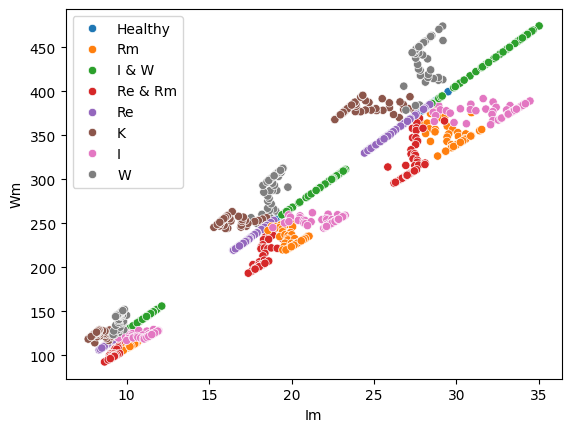

In [ ]:
sns.scatterplot(data=DF.iloc[::200,:],x='Im',y='Wm',hue='Fault_type')
plt.legend()
plt.show()

## Residual Data

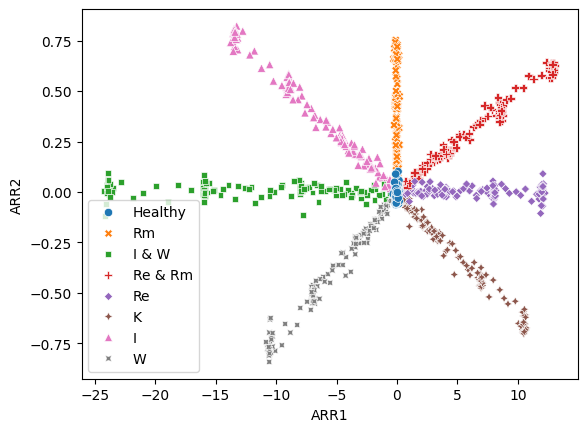

In [ ]:
sns.scatterplot(data=DF.iloc[::200,:],x='ARR1',y='ARR2',style='Fault_type',hue='Fault_type')
plt.legend()
plt.show()